#### _Group #36 Project Proposal_
# Heart Disease Dataset

In [28]:
# These packages need to be loaded

library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

options(repr.matrix.max.rows = 6)

# _1) Introduction:_

1. Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
2. Clearly state the question you will try to answer with your project
3. Identify and describe the dataset that will be used to answer the question

# _2Preliminary exploratory data analysis:_

 1. Demonstrate that the dataset can be read from the web into R ✅ 
 2. Clean and wrangle your data into a tidy format ✅
 3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
 4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


In [29]:
# Here I demonstrate that the data can be read into R
# I perform the as_factor() function on the target column because that is the column we are using for our question
# I also select the columns that we will use in our analysis as the predictors as all of them are not needed

heart_disease <- read_csv("heart.csv") %>%
    mutate(target = as_factor(target)) %>%
    select(age, trestbps, chol, fbs, thalach, thal, target)

head(heart_disease)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



age,trestbps,chol,fbs,thalach,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,125,212,0,168,3,0
53,140,203,1,155,3,0
70,145,174,0,125,3,0
61,148,203,0,161,3,0
62,138,294,1,106,2,0
58,100,248,0,122,2,1



* (❗️) Our data is already in a tidy format because in each column there is one topic and each row has one observation


In [30]:
glimpse(heart_disease)

Rows: 1,025
Columns: 7
$ age      <dbl> 52, 53, 70, 61, 62, 58, 58, 55, 46, 54, 71, 43, 34, 51, 52, …
$ trestbps <dbl> 125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, …
$ chol     <dbl> 212, 203, 174, 203, 294, 248, 318, 289, 249, 286, 149, 341, …
$ fbs      <dbl> 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, …
$ thalach  <dbl> 168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 125, 136, …
$ thal     <dbl> 3, 3, 3, 3, 2, 2, 1, 3, 3, 2, 2, 3, 2, 3, 0, 2, 2, 3, 2, 2, …
$ target   <fct> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, …


### Explore The Data
* Here, I summarized the data in one table (exploratory data analysis). An example I used is a table that reports the number of observations in each class, 

* (the means of the predictor variables you plan to use in your analysis and how many rows have missing data)

In [31]:
obs <- nrow(heart_disease)
obs

[1] 1025

* There are a total of 1025 observations in this dataset

In [32]:
heart_disease_obs <- heart_disease %>%
    group_by(target) %>%
    summarize(count = n(), percentage = n()/obs * 100)

heart_disease_obs

`summarise()` ungrouping output (override with `.groups` argument)



target,count,percentage
<fct>,<int>,<dbl>
0,499,48.68293
1,526,51.31707


* This illustrates that in this data set, 48% do not have a heart disease, and 51 % do have a heart disease

### Visualize the Data

Using only training data, visualize the data with one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example I used is one that compares the distributions of each of the predictor variables we plan to use in our analysis.

In [33]:
# I first Scale and Center the DATA here

scaled_heart_disease <- recipe(target  ~ ., data = heart_disease) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep() %>%
    bake(heart_disease)

scaled_heart_disease

age,trestbps,chol,fbs,thalach,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.2683056,-0.3774513,-0.6590104,-0.4186735,0.8209198,1.08932,0
-0.1580799,0.4788735,-0.8334543,2.3861656,0.2558430,1.08932,0
1.7157579,0.7643151,-1.3955514,-0.4186735,-1.0481803,1.08932,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.81943436,-1.2337761,0.5620971,-0.4186735,-1.3524524,-0.5218676,0
-0.48875711,-1.2337761,0.1550613,-0.4186735,0.4297128,-0.5218676,1
-0.04785411,-0.6628929,-1.1241942,-0.4186735,-1.5697896,1.0893199,0


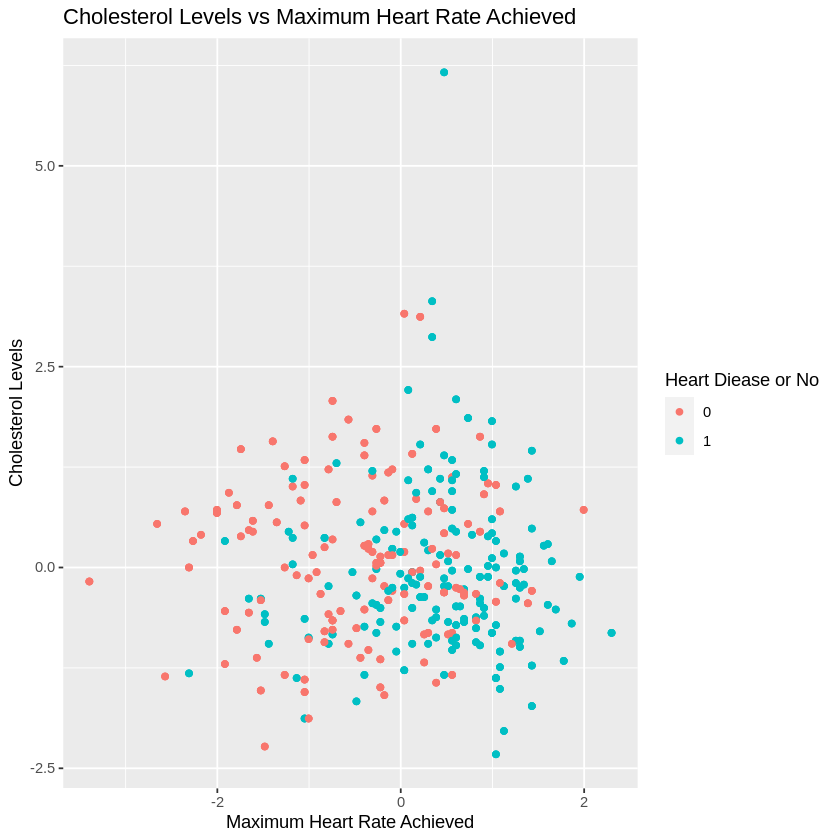

In [34]:
# Use this cell to visualize the dataset
# I plot a graph of cholesterol levels vs. maximum heart rate achieved

heart_disease_plot <- scaled_heart_disease %>%
    ggplot(aes(x = thalach, y = chol, color = target)) +
    geom_point() +
    labs(x = "Maximum Heart Rate Achieved", y = "Cholesterol Levels", color = "Heart Diease or No") +
    ggtitle("Cholesterol Levels vs Maximum Heart Rate Achieved")

heart_disease_plot

* This graph illustrates some relationship between the 2 predictors and if the individual has a heart disease

# _METHODS:_

1. Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
2. Describe at least one way that you will visualize the results

# _Expected outcomes and significance:_

1. What do you expect to find?
2. What impact could such findings have?
3. What future questions could this lead to?